<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/maxime-garnier/Projet_Moreau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#importer le jeu de données depuis mon drive
df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=";")

In [ ]:
df

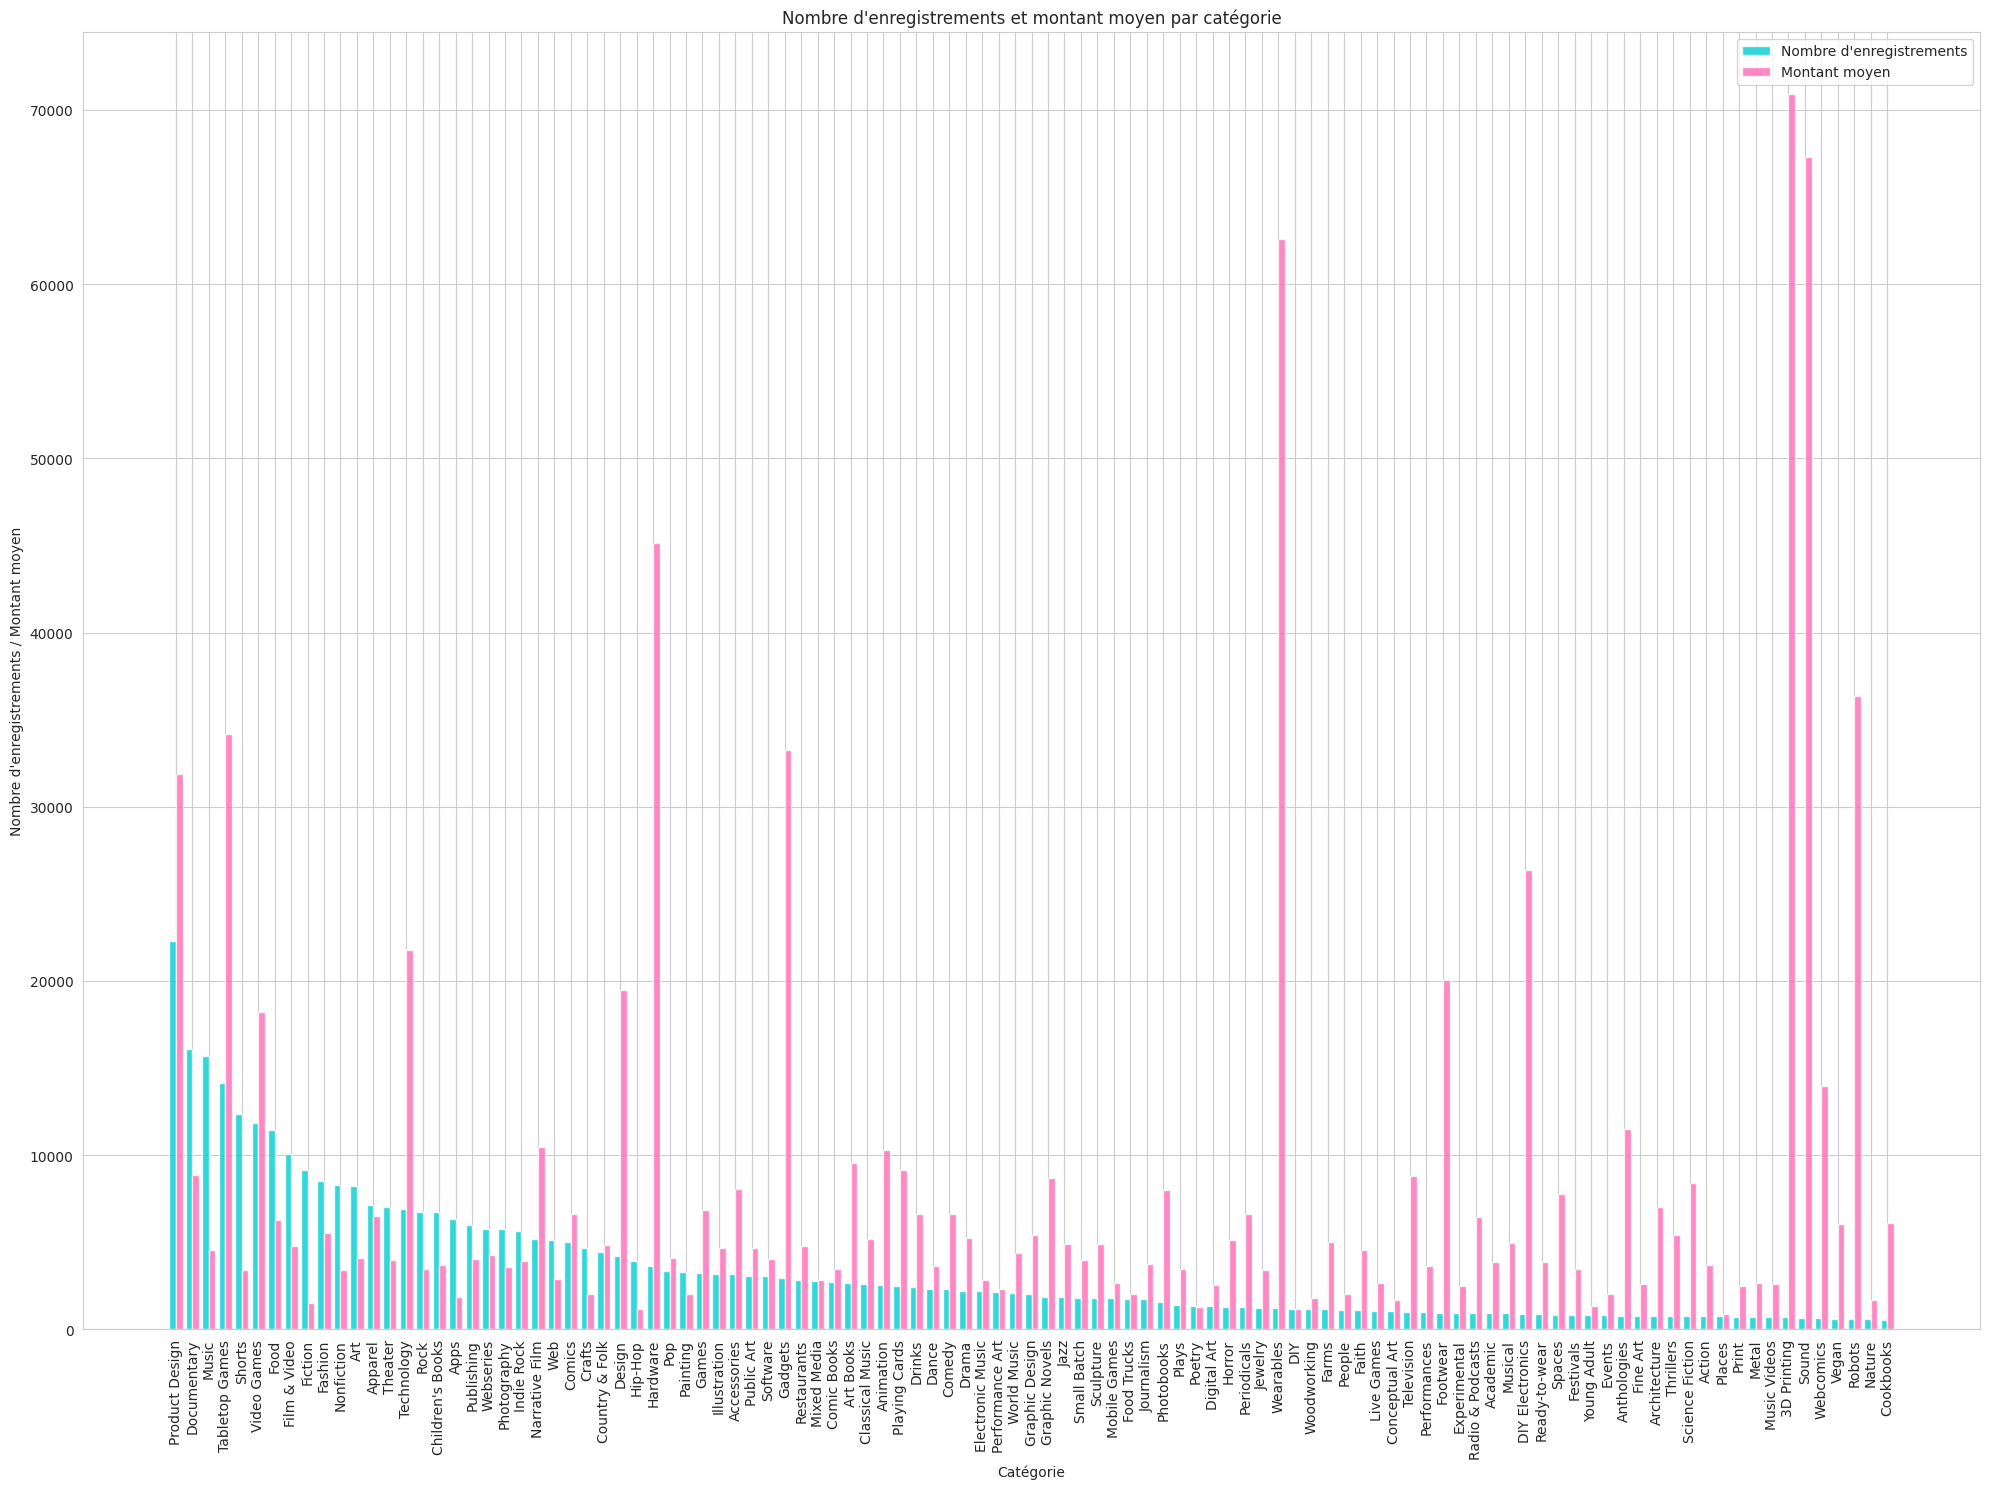

In [43]:
# Calculer les montants moyens par catégorie
montant_moyen = df.groupby("categorie")["promesse"].mean()

# Sélectionner les catégories à garder (celles qui ont plus de 50 enregistrements)
categories_garder = nb_enregistrements[nb_enregistrements > 200].index

# Filtrer la variable montant_moyen pour ne garder que les catégories à garder et trier dans l'ordre des index de nb_enregistrements_filtre
montant_moyen_filtre = montant_moyen[categories_garder].loc[nb_enregistrements_filtre.index]

# Créer un graphique à barres avec les nombres d'enregistrements et les montants moyens par catégorie
fig, ax = plt.subplots(figsize=(20, 15))
bar_width = 0.4
opacity = 0.8
pos_ticks = np.arange(len(nb_enregistrements_filtre.index))

pastel_colors = ['#FFA07A', '#6B8E23', '#AFEEEE', '#D2B48C', '#CD853F', '#7B68EE', '#00CED1', '#FFD700', '#FF69B4']


rects1 = ax.bar(pos_ticks - bar_width/2, nb_enregistrements_filtre, bar_width,
                alpha=opacity, color= pastel_colors[6], label="Nombre d'enregistrements")
rects2 = ax.bar(pos_ticks + bar_width/2, montant_moyen_filtre, bar_width,
                alpha=opacity, color=pastel_colors[8], label='Montant moyen')

ax.set_xlabel('Catégorie')
ax.set_ylabel("Nombre d'enregistrements / Montant moyen")
ax.set_title("Nombre d'enregistrements et montant moyen par catégorie")
ax.set_xticks(pos_ticks)
ax.set_xticklabels(nb_enregistrements_filtre.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


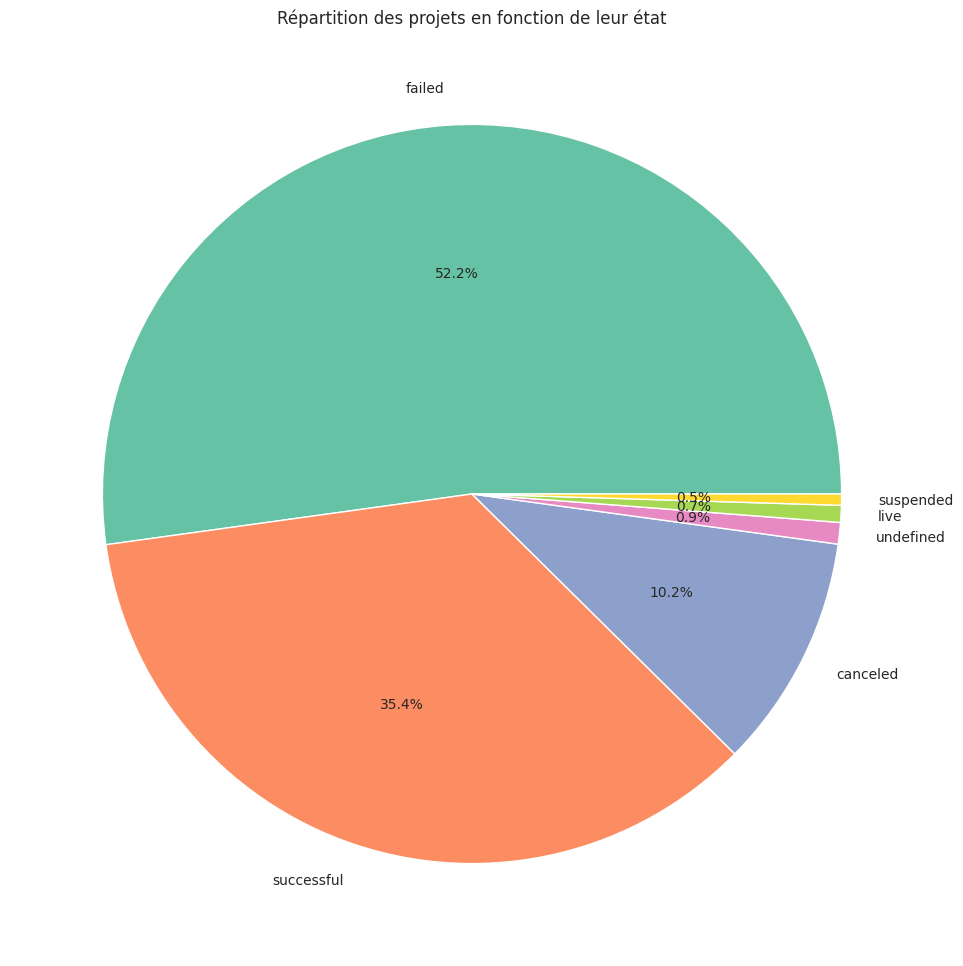

In [29]:
# Compter le nombre de projets en fonction de leur état
etat_counts = df['etat'].value_counts()

# Configurer le style visuel avec Seaborn
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Créer un diagramme circulaire avec Seaborn
plt.figure(figsize=(12, 12))
plt.pie(etat_counts, labels=etat_counts.index, autopct='%1.1f%%')
plt.title('Répartition des projets en fonction de leur état')
plt.show()